### Implement AO* Algorithm

Solution Graph: {'A': ['C'], 'C': ['F'], 'F': []}
Costs: {'A': 7, 'C': 1, 'F': inf}


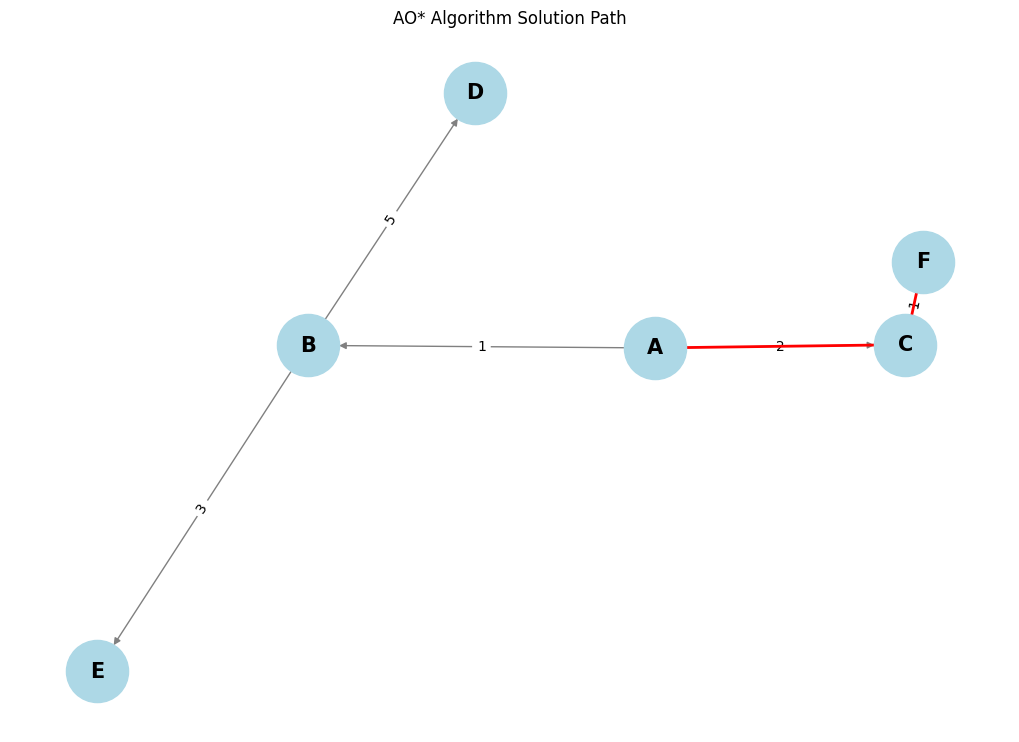

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
class Graph:
    def __init__(self):
        self.graph = {}  # Adjacency list representation
        self.heuristics = {}  # Heuristics for each node

    def add_node(self, node, h=0):
        self.graph[node] = []
        self.heuristics[node] = h

    def add_edge(self, parent, child, cost):
        self.graph[parent].append((child, cost))

# The AO* Algorithm
def AO_star(graph, start):
    open_list = {start: graph.heuristics[start]}
    closed_list = {}
    solution_graph = {start: []}

    def expand_node(node):
        children = graph.graph[node]
        min_cost = float('inf')
        best_path = []

        for (child, cost) in children:
            total_cost = cost + graph.heuristics[child]
            if total_cost < min_cost:
                min_cost = total_cost
                best_path = [child]

        closed_list[node] = min_cost
        solution_graph[node] = best_path

        for n in best_path:
            open_list[n] = graph.heuristics[n]

    while open_list:
        node = min(open_list, key=open_list.get)
        expand_node(node)
        open_list.pop(node)

    return solution_graph, closed_list

# Plotting the graph using NetworkX and Matplotlib
def plot_graph(graph, solution_graph):
    G = nx.DiGraph()
    for node in graph.graph:
        for (child, cost) in graph.graph[node]:
            G.add_edge(node, child, weight=cost)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_size=15, font_weight='bold', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlighting the solution graph
    solution_edges = [(k, v[0]) for k, v in solution_graph.items() if v]
    nx.draw_networkx_edges(G, pos, edgelist=solution_edges, edge_color='red', width=2)

    plt.title("AO* Algorithm Solution Path")
    plt.show()

# Example usage
graph = Graph()
graph.add_node('A', 10)
graph.add_node('B', 8)
graph.add_node('C', 5)
graph.add_node('D', 7)
graph.add_node('E', 3)
graph.add_node('F', 0)

graph.add_edge('A', 'B', 1)
graph.add_edge('A', 'C', 2)
graph.add_edge('B', 'D', 5)
graph.add_edge('B', 'E', 3)
graph.add_edge('C', 'F', 1)

solution_graph, costs = AO_star(graph, 'A')
print("Solution Graph:", solution_graph)
print("Costs:", costs)

plot_graph(graph, solution_graph)